In [8]:
import pandas as pd 
import numpy as np 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url,header = None)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x, y = wine.iloc[:,1:].values, wine.iloc[:,0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size = 0.3,
                                                random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [24]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
def plot_decision_regions(x, y, classifier, test_idx = None, resolution = 0.2):


    markers = ("o","x","*","^","v")
    colors = ("red","blue","green","grey","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    x1_min,x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min,x2_max = x[:,1].min() - 1, x[:,1].max() + 1

    xx1,xx2 = np.meshgrid( np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution) )
    zx = np.array([ xx1.ravel(), xx2.ravel()]).T
    z = classifier.predict( zx )
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha = 0.4,cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x = x[y == cl, 0],
                    y = x[ y == cl, 1],
                    alpha = 0.8,
                    cmap = cmap(idx),
                    marker = markers[idx],
                    label = cl )
        
        if test_idx:
            x_test, y_test = x[test_idx,:], y[test_idx]
            plt.scatter(x_test[:,0], 
                        x_test[:,1], 
                        c = "",
                        alpha = 1.0, 
                        linewidths = 1, 
                        marker = "o", 
                        s = 55,
                        label = "test set")



/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


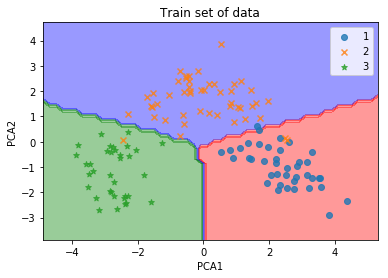

In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
l = LogisticRegression()

x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)
l.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca,y_train, classifier = l)

plt.title("Train set of data")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc ="best")
plt.show()

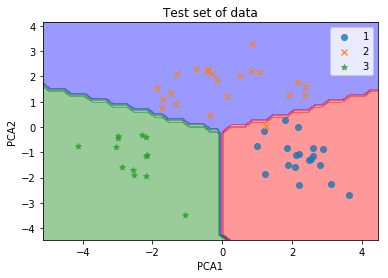

In [28]:
plot_decision_regions(x_test_pca,y_test, classifier = l)

plt.title("Test set of data")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc ="best")
plt.show()